***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [1. Building the Concepts](01_00_introduction.ipynb)  
    * Previous: [1.6 Visualising Data Sets with Aplpy](01_06_visualising_data_sets_with_aplpy.ipynb)
    * Next: [1.8 Rotations in 2-D and 3-D](01_08_rotations_in_2-D_ and_3-D.ipynb)

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [3]:
import gaussian #custom module
import pyfits
from scipy.signal import convolve2d

## 1.5 Manipulating Fits Files and Data with PyFITS, Numpy and Scipy

The content (header and data units) read from fits files can be modified as desired.
In the header unit, existing header attributes can be modified and new header attributes can be added. There also exist other convenient functions that are available in pyfits: append(), info(), writeto(), getval(), setval().
The content of the data unit is stored in a numpy array. This allows for us to manipulate the contents just like any other array.

The tasks outlined below would be used to illustrate manipulating data unit stored in a numpy array:

* Read the file n2541_lr.fits into a numpy array 
    - Change a pixel to 0.05 and write the data set out in fits format
    - Replace all pixel values with 0.
    - Replace pixel (30,40,50) with 1
* Convolve with a Gaussian of 30'' width
* Write out the result and check if the result is correct.

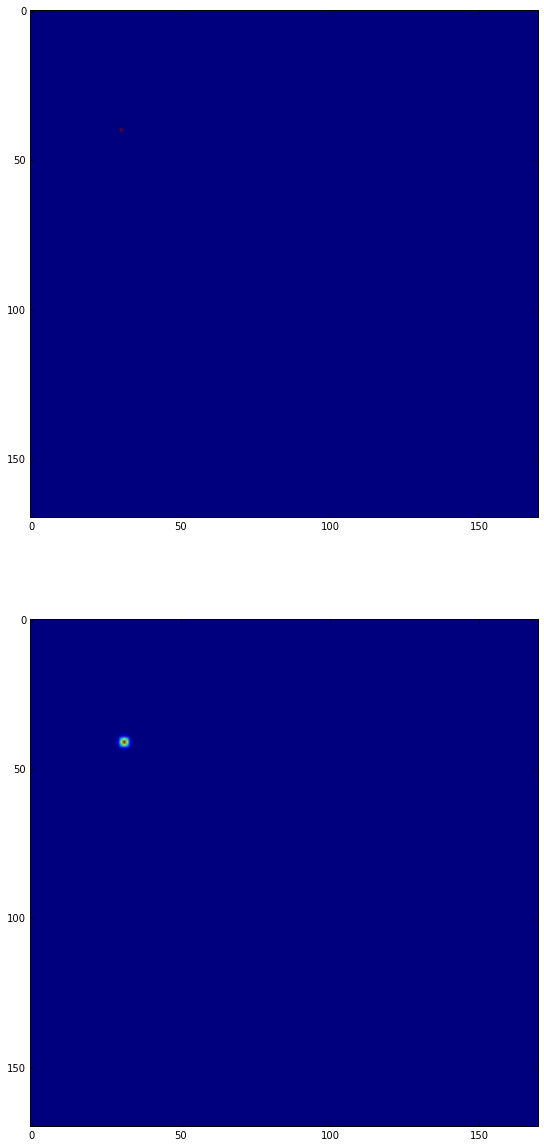

In [4]:
#data unit is read into numpy array
data, header = pyfits.getdata('/home/samuel/software/samtirifik-master/chapter_01_concepts/01_data/n2541_lr_in.fits',header=True)

#replace pixel (50,50,50) with 0 & write results in fits format
data[50,50,50] = 0
pyfits.writeto('/home/samuel/software/samtirifik-master/chapter_01_concepts/01_data/newFile50.fits',data,header)

#replace all pixel with 0 and pixel (30,40,50) with 1
data.fill(0)
data[50,40,30]=1.

#make gaussian and convolve with 30" (30" is default fwhm in symGaussian function)
gauss2D = gaussian.symGaussian(20)
conv_data = convolve2d(in1 = data[50], in2 = gauss2D, mode = 'same')

#write out the results
pyfits.writeto('/home/samuel/software/samtirifik-master/chapter_01_concepts/01_data/newFile.fits',conv_data,header)

# plot displaying results
plots=[]; plots.append(data[50]); plots.append(conv_data)
plt.figure(figsize=(100,20))  
for i in range(2):
    plt.subplot2grid((2,1), (i,0))
    plt.imshow(plots[i])


***

* Next: [1.8 Rotations in 2-D and 3-D](01_08_rotations_in_2-D_ and_3-D.ipynb)